<img src = "bgg_data_visualisation.png" style = "width:800px" align = "left" >

### About BoardGameGeek
[BoardGameGeek](https://boardgamegeek.com/) is an online forum and game database catered towards board gaming hobbyists.

### Table of Contents

* [Maximum Player Counts](#max_player_count)
* [Amount of Games Published Per Year](#published_per_year)
* [Ratings Distribution](#ratings_distribution)

In [2]:
#import required packages
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter
import matplotlib.lines as lines
import numpy as np

In [3]:
#read in the dataset
games = pd.read_csv('datasets/games.csv')

### Maximum Player Counts <a class="anchor" id="max_player_count"></a>

In [172]:
#count the number of games of each player count, rename columns
players_df = games.groupby('MaxPlayers').count()[['BGGId']].reset_index().rename(columns = {'MaxPlayers':'max_players','BGGId':'game_count'})

In [173]:
#count the number of games that have a maximum player count greater than 12
thirteen_above_count = players_df[players_df.max_players > 12].sum()['game_count']

In [174]:
#only keep the rows that have a maximum player count of 12 or less
players_df = players_df[(players_df['max_players'] <= 12) & (players_df['max_players'] >= 1)]

In [175]:
#append the row which shows the number of games with a player count of 13 or above
players_df = players_df.append({'max_players':'13+','game_count': thirteen_above_count}, ignore_index = True)

In [176]:
#rank the player counts 
players_df['rank'] = players_df['game_count'].rank(ascending = False)

#create colour map for highlighting three highest player counts
colour_map = '#3D3760'
highlight_colour = '#FF5000'

colours = []

for rank in players_df['rank']:
    if (rank >= 1) & (rank <= 3):
        colours.append(highlight_colour)
    else:
        colours.append(colour_map)  

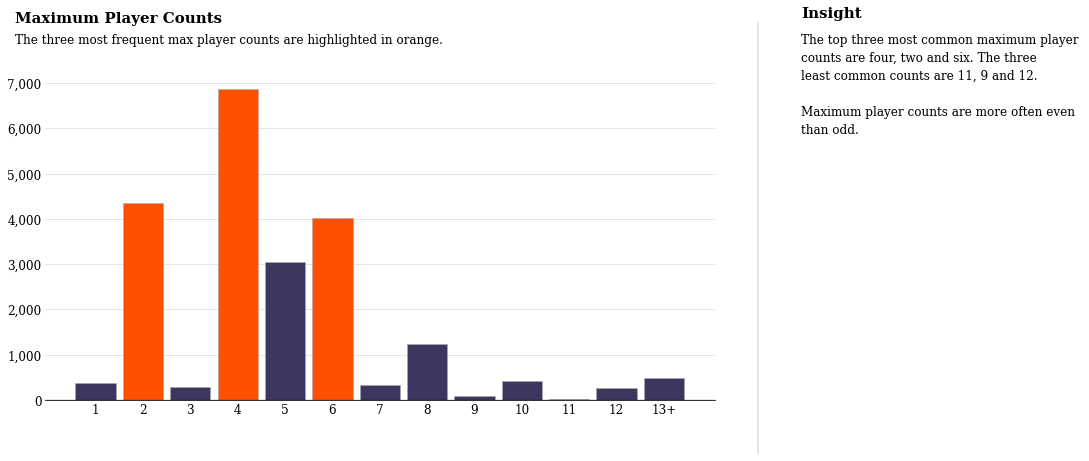

In [194]:
#create the axis
fig, ax = plt.subplots(1,1, figsize=(12, 6))

#create the chart
ax.bar(players_df.index, players_df.game_count, width=0.85, 
       edgecolor='darkgray',
       linewidth=0.6, color=colours)

#remove axis spines
for s in ['top', 'left', 'right']:
    ax.spines[s].set_visible(False)
    
#add line to right hand side
l1 = lines.Line2D([0.95, 0.95], [0, 1], transform=fig.transFigure, figure=fig, color='black',lw=0.2)
fig.lines.extend([l1])
    
#add title
fig.text(0.09, 1, 'Maximum Player Counts', fontsize=15, fontweight='bold', fontfamily='serif')

#add subtitle
fig.text(0.09, 0.95, 'The three most frequent max player counts are highlighted in orange.', fontsize=12, fontweight='light', fontfamily='serif')

#add insight title
fig.text(1, 1.01, 'Insight', fontsize=15, fontweight='bold', fontfamily='serif')

#add insight
fig.text(1, 0.70, '''
The top three most common maximum player 
counts are four, two and six. The three
least common counts are 11, 9 and 12.

Maximum player counts are more often even 
than odd.
'''
         , fontsize=12, fontweight='light', fontfamily='serif', linespacing = 1.5)

#format y-axis
ax.grid(axis='y', linestyle='-', alpha=0.4)   
grid_y_ticks = np.arange(0, 8000, 1000) #y ticks, min, max, step
ax.set_yticks(grid_y_ticks)
ax.set_axisbelow(True)
plt.yticks(family ='serif', fontsize = 12)

ax.get_yaxis().set_major_formatter(ticker.FuncFormatter(lambda x, p: format(int(x), ',')))

#format x-axis
plt.axhline(y = 0, color = 'black', linewidth = 1.3, alpha = .7)
ax.tick_params(axis='both', which='major', labelsize=12)
ax.set_xticks(players_df.index)
ax.set_xticklabels(players_df['max_players'])
plt.xticks(family = 'serif', fontsize = 12)

#remove axis-icks
ax.tick_params(axis=u'both', which=u'both',length=0)

#show chart
plt.show()

## Amount Published Per Year <a class="anchor" id="published_per_year"></a>

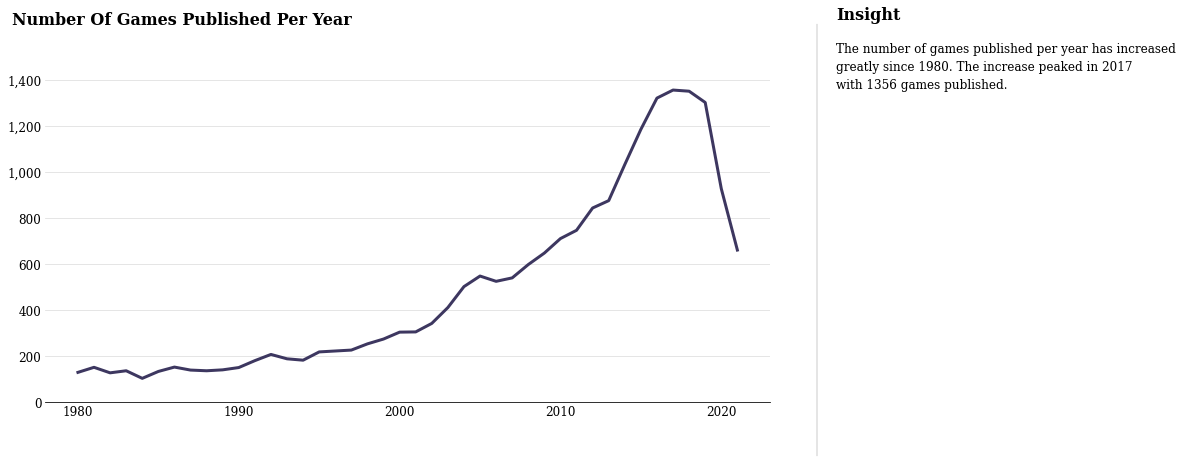

In [195]:
games_since_1980 = games[games['YearPublished'] >= 1980]['YearPublished'].value_counts().sort_index()

color_map = '#3D3760'

fig, ax = plt.subplots(1,1, 
                       figsize= (13, 6))

ax.plot(games_since_1980,
        linewidth=3,
        color=color_map)

for s in ['top', 'left', 'right']:
    ax.spines[s].set_visible(False)
    
fig.text(0.09, 1, 
         'Number Of Games Published Per Year', 
         fontsize=16, 
         fontweight='bold', 
         fontfamily='serif')

ax.grid(axis='y', 
        linestyle='-', 
        alpha=0.4)   
grid_y_ticks = np.arange(0, 1500, 200) # y ticks, min, max, then step
ax.set_yticks(grid_y_ticks)
ax.set_axisbelow(True)

ax.get_yaxis().set_major_formatter(ticker.FuncFormatter(lambda x, p: format(int(x), ',')))


plt.xticks(family = 'serif', 
           fontsize = 12)

plt.yticks(family = 'serif', 
           fontsize = 12)

ax.tick_params(axis=u'both', which=u'both',length=0)

l1 = lines.Line2D([0.95, 0.95], [0, 1], transform=fig.transFigure, figure=fig, color='black',lw=0.2)
fig.lines.extend([l1])
fig.text(0.97, 1.01, 'Insight', fontsize = 16, fontweight = 'bold', fontfamily = 'serif')

fig.text(0.97, 0.85,'''The number of games published per year has increased
greatly since 1980. The increase peaked in 2017 
with 1356 games published.''', linespacing = 1.5, fontsize = 12, fontfamily = 'serif', fontweight = 'light')


plt.show()

## Ratings Distribution<a class="anchor" id="ratings_distribution"></a>

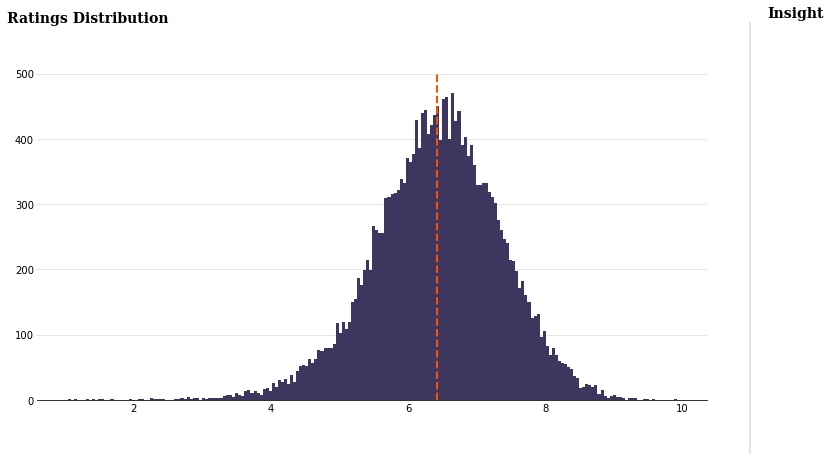

In [33]:
colour_map = '#3D3760'
highlight_colour = '#FF5000'

fig, ax = plt.subplots(1,1, 
                       figsize= (12, 6))

ax.hist(games['AvgRating'], bins = 200, color = colour_map)

for s in ['top', 'right', 'left']:
    ax.spines[s].set_visible(False)
    
grid_y_ticks = np.arange(0, 600, 100) # y ticks, min, max, then step
ax.set_yticks(grid_y_ticks)
    
fig.text(0.09, 1, 
         'Ratings Distribution', 
         fontsize=14, 
         fontweight='bold', 
         fontfamily='serif')

ax.tick_params(axis=u'both', which=u'both',length=0)

l1 = lines.Line2D([0.95, 0.95], [0, 1], transform=fig.transFigure, figure=fig, color='black',lw=0.2)
fig.lines.extend([l1])
fig.text(0.97, 1.01, 'Insight', fontsize = 14, fontweight = 'bold', fontfamily = 'serif')

plt.axvline(games['AvgRating'].mean(), color = highlight_colour, linestyle='dashed', linewidth=2)

ax.set_axisbelow(True)
ax.grid(axis = 'y', alpha = 0.4)

plt.show()